In [22]:
import os
import cv2
import numpy as np
import time
import random

In [23]:

root_path = os.getcwd()
train_path = root_path+ '/cats_and_dogs_filtered/train'
test_path = root_path+ '/cats_and_dogs_filtered/test'

In [24]:
img_width = 128
img_height = 128
BATCH_SIZE = 32
EPOCHS = 20

def load_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img,(img_width, img_height))
    return img

In [25]:
X_train,Y_train = [],[]
X_test,Y_test = [],[]

def load_test_img(img_path):

    temp_X, temp_Y = [], []
    for cur_class in os.listdir(img_path):
        label = ""
        if cur_class == '.DS_Store':
            continue
        
        if cur_class == "cats":
            label = [1,0]
        else:
            label = [0,1]

        for filename in os.listdir(img_path+"/"+cur_class):
            if filename == '.DS_Store':
                continue

            full_img_path = img_path+"/"+cur_class+"/"+filename
            img = load_img(full_img_path)
            temp_X.append(img)
            temp_Y.append(label)
            
    return np.array(temp_X), np.array(temp_Y)

In [26]:
X_train,Y_train = load_test_img(train_path)
X_test,Y_test = load_test_img(test_path)

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)


X_train shape:  (2752, 128, 128, 3)
Y_train shape:  (2752, 2)
X_test shape:  (248, 128, 128, 3)
Y_test shape:  (248, 2)


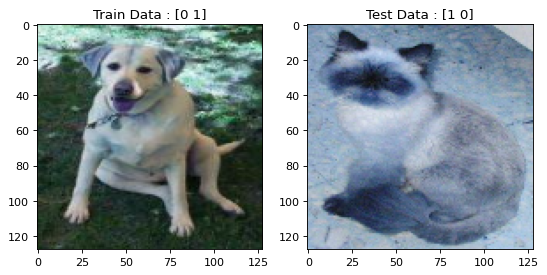

In [27]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

index = random.randint(0, len(X_test)-1)

figure(figsize=(8, 6), dpi=80)
plt.subplot(1,2,1)
plt.title(f"Train Data : {Y_train[index]}")
plt.imshow(X_train[index])


plt.subplot(1,2,2)
plt.title(f"Test Data : {Y_test[index]}")
plt.imshow(X_test[index])



plt.show()

### MLP model training

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Rescaling


In [29]:
mlp_model = Sequential([
    Rescaling(1./255, input_shape=(img_width, img_height, 3)),
    
    Flatten(),
    
    Dense(67, activation='relu'),
    
    Dense(2, activation='sigmoid')
])

mlp_model.compile(optimizer='adam',
                  loss='categorical_crossentropy', # binary_crossentropy for binary classification
                  metrics=['accuracy'])
mlp_model.summary()

/Users/tharhtet/.local/share/virtualenvs/6_deep_learning-3jfSPIh1/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 67)             │     3,293,251 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,293,387 (12.56 MB)

 Trainable params: 3,293,387 (12.56 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
mlp_history = mlp_model.fit(X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4913 - loss: 18.3691 - val_accuracy: 0.5403 - val_loss: 6.3224
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4992 - loss: 2.6946 - val_accuracy: 0.5403 - val_loss: 1.1860
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4914 - loss: 1.0571 - val_accuracy: 0.5403 - val_loss: 2.1222
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5002 - loss: 2.1253 - val_accuracy: 0.5403 - val_loss: 3.4997
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4920 - loss: 1.7637 - val_accuracy: 0.5403 - val_loss: 0.8295
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4915 - loss: 2.2179 - val_accuracy: 0.5403 - val_loss: 1.5851
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4969 - loss: 1.2867 - val_accuracy: 0.5403 - val_loss: 1.0909
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4949 - loss: 1.2135 - val_accuracy: 0.5403 - 

In [31]:
print("--- Evaluating MLP on Test Data ---")
mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, Y_test)
print(f"MLP Test Accuracy: {mlp_accuracy:.4f}")


--- Evaluating MLP on Test Data ---
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2639 - loss: 1.2746   
MLP Test Accuracy: 0.5403


### CNN model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

In [33]:
model = Sequential([
    # Input layer: Rescale pixel values from [0, 255] to [0, 1]
    Rescaling(1./255, input_shape=(img_width, img_height, 3)),


    # Convolutional blocks 
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    
    Dense(2, activation='sigmoid')
])

In [34]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # binary_crossentropy for binary classification
              metrics=['accuracy'])

In [35]:
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=EPOCHS, # Train for more epochs on a real dataset
    batch_size=BATCH_SIZE
)


Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.4906 - loss: 0.8618 - val_accuracy: 0.4597 - val_loss: 0.6941
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5322 - loss: 0.6896 - val_accuracy: 0.5645 - val_loss: 0.6774
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5603 - loss: 0.6854 - val_accuracy: 0.6532 - val_loss: 0.6420
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6671 - loss: 0.6169 - val_accuracy: 0.6290 - val_loss: 0.6339
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6976 - loss: 0.5741 - val_accuracy: 0.6492 - val_loss: 0.6286
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7403 - loss: 0.5233 - val_accuracy: 0.6774 - val_loss: 0.6258
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7628 - loss: 0.4900 - val_accuracy: 0.6855 - val_loss: 0.5861
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7823 - loss: 0.4565 - val_accuracy: 0.6855 - v

In [37]:
print("--- Evaluating CNN on Test Data ---")
CNN_loss, CNN_accuracy = model.evaluate(X_test, Y_test)
print(f"CNN Test Accuracy: {CNN_accuracy:.4f}")

--- Evaluating CNN on Test Data ---
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7140 - loss: 4.3931
CNN Test Accuracy: 0.6895


### Let's check on graph

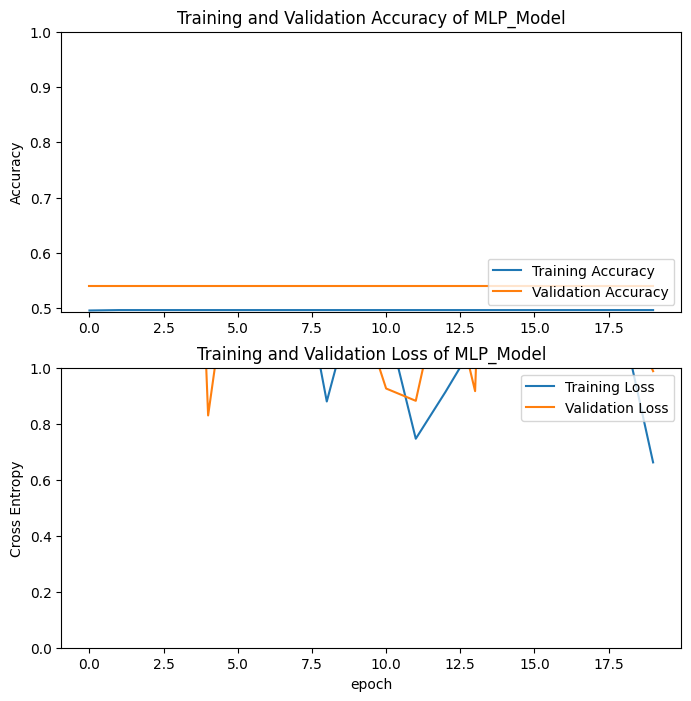

In [38]:
import matplotlib.pyplot as plt
acc = mlp_history.history['accuracy']
val_acc = mlp_history.history['val_accuracy']

loss = mlp_history.history['loss']
val_loss = mlp_history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy of MLP_Model')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss of MLP_Model')
plt.xlabel('epoch')
plt.show()

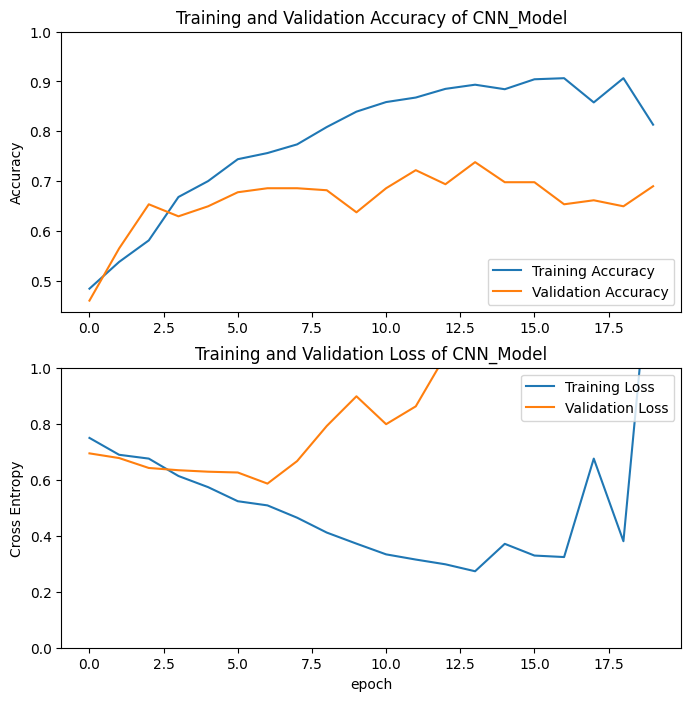

In [39]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy of CNN_Model')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss of CNN_Model')
plt.xlabel('epoch')
plt.show()